# Chicago Public Library Accessibility by Ward

## 1. Overview / Introduction

Access to public libraries plays an important role in supporting community education and equal access to resources. Libraries offer books, internet access, programming, and community gathering spaces that are very importatn for society.

But access to these resources is not always evenly distributed across a city. Specifically, some wards might have multiple libraries within close proximity, while others might have none. Identifying these geographic disparities can help highlight where more investment in libraries might be most needed.

In this analysis, we use spatial data science methods to:
- Map the distribution of public libraries in Chicago 
- lay over the library locations with ward boundaries  
- Count the number of libraries in each ward
- Visualize the results with a choropleth map and proximity buffer zones

This provides a spatial understanding of library accessibility that can be used to make decisions related to public service planning and equal resource allocation.

## 2. Reading and Visualizing Input Data

We will use:
- A CSV file of library locations (that hav latitude and longitude coordinates)
- A GeoJSON file of Chicago wards
- Python geospatial libraries like geopandas, shapely, matplotlib

These datasets will help us visualize both point data (library locations) and polygon data (ward boundaries) on a single map.



In [30]:
# import the livraries
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# load the datasets
libraries_csv = pd.read_csv("library.csv") 
# get logitude and latitude coordinates from the location column
def coords(location_str):
    # Remove whitespace
    location_str = location_str.strip()
    # Remove parentheses
    location_str = location_str.strip("()")
    # Split by a comma
    lat_str, lon_str = location_str.split(",")
    # Convert to float
    return float(lat_str.strip()), float(lon_str.strip())
libraries_csv["Latitude"], libraries_csv["Longitude"] = zip(*libraries_csv["LOCATION"].apply(coords))

# geometry colum in data, creating the geodataframe
geometry = [Point(xy) for xy in zip(libraries_csv["Longitude"], libraries_csv["Latitude"])]
libraries = gpd.GeoDataFrame(libraries_csv, geometry=geometry)
libraries.set_crs(epsg=4326, inplace=True)



BRANCH  \
0                Albany Park   
1                    Altgeld   
2             Archer Heights   
3                     Austin   
4              Austin-Irving   
..                       ...   
76              West Pullman   
77                 West Town   
78     Whitney M. Young, Jr.   
79  Woodson Regional Library   
80        Wrightwood-Ashburn   

                                        SERVICE HOURS  \
0   Mon. & Wed., 10-6; Tues. & Thurs., Noon-8; Fri...   
1   Mon. & Wed., Noon-8; Tue. & Thu., 10-6; Fri. &...   
2   Mon. & Wed., Noon-8; Tue. & Thu., 10-6; Fri. &...   
3   Mon. & Wed., Noon-8; Tues. & Thurs., 10-6; Fri...   
4   Mon. & Wed., Noon-8; Tue. & Thu., 10-6; Fri. &...   
..                                                ...   
76  Mon. & Wed., Noon-8; Tue. & Thu., 10-6; Fri. &...   
77  Mon. & Wed., 10-6; Tues. & Thurs., Noon-8; Fri...   
78  Mon. & Wed., 10-6; Tues. & Thurs., Noon-8; Fri...   
79    Mon. - Thurs., 9-8; Fri. & Sat., 9-5; Sun., 1-5   
80  Mon. & Wed., Noon-8; Tue. & Thu., 10-6; Fri. &...   

                    ADDRESS     CITY STATE    ZIP           PHONE  \
0       3401 W. Foster Ave.  Chicago    IL  60625  (773) 539-5450   
1          955 E. 131st St.  Chicago    IL  60827  (312) 747-3270   
2       5055 S. Archer Ave.  Chicago    IL  60632  (312) 747-9241   
3         5615 W. Race Ave.  Chicago    IL  60644  (312) 746-5038   
4   6100 W. Irving Park Rd.  Chicago    IL  60634  (312) 744-6222   
..                      ...      ...   ...    ...             ...   
76         830 W. 119th St.  Chicago    IL  60643  (312) 747-1425   
77     1625 W. Chicago Ave.  Chicago    IL  60622  (312) 743-0450   
78        415 East 79th St.  Chicago    IL  60619  (312) 747-0039   
79      9525 S. Halsted St.  Chicago    IL  60628  (312) 747-6900   
80      8530 S. Kedzie Ave.  Chicago    IL  60652  (312) 747-2696   

                                    WEBSITE                      BRANCH EMAIL  \
0    https://www.chipublib.org/locations/3/          albanypark@chipublib.org   
1    https://www.chipublib.org/locations/4/             altgeld@chipublib.org   
2    https://www.chipublib.org/locations/5/       archerheights@chipublib.org   
3    https://www.chipublib.org/locations/6/              austin@chipublib.org   
4    https://www.chipublib.org/locations/7/       austin-irving@chipublib.org   
..                                      ...                               ...   
76  https://www.chipublib.org/locations/78/         westpullman@chipublib.org   
77  https://www.chipublib.org/locations/79/            westtown@chipublib.org   
78  https://www.chipublib.org/locations/80/        whitneyyoung@chipublib.org   
79  https://www.chipublib.org/locations/81/     woodsonregional@chipublib.org   
80  https://www.chipublib.org/locations/82/  wrightwood-ashburn@chipublib.org   

                                        LOCATION   Latitude  Longitude  \
0        (41.97557881655979, -87.71361314512697)  41.975579 -87.713613   
1        (41.65719847558056, -87.59883829075173)  41.657198 -87.598838   
2        (41.80110836194246, -87.72648385568911)  41.801108 -87.726484   
3         (41.88917312206642, -87.7658203582574)  41.889173 -87.765820   
4        (41.95312267684315, -87.77928489355646)  41.953123 -87.779285   
..                                           ...        ...        ...   
76        (41.67790647382097, -87.6431683153105)  41.677906 -87.643168   
77       (41.89594730478282, -87.66829305460979)  41.895947 -87.668293   
78        (41.7510184591363, -87.61495065361933)  41.751018 -87.614951   
79      (41.720694885749005, -87.64304817213312)  41.720695 -87.643048   
80       (41.73795704970435, -87.70221598421591)  41.737957 -87.702216   

                      geometry  
0   POINT (-87.71361 41.97558)  
1   POINT (-87.59884 41.65720)  
2   POINT (-87.72648 41.80111)  
3   POINT (-87.76582 41.88917)  
4   POINT (-87.77928 41.95312)  
..                         ...  
76  POINT (-87.64317 41.67791)

In [31]:
# load the chicago wards
wards = gpd.read_file("ward.geojson")  
# Check CRS
print("Wards CRS:", wards.crs)
print("Libraries CRS:", libraries.crs)
libraries = libraries.to_crs(wards.crs)

Wards CRS: epsg:4326
Libraries CRS: epsg:4326


In [32]:
# assign each library to a ward
libraries_in_wards = gpd.sjoin(libraries, wards, how="inner", op='within')
print(libraries_in_wards.head())

         BRANCH                                      SERVICE HOURS  \
0   Albany Park  Mon. & Wed., 10-6; Tues. & Thurs., Noon-8; Fri...   
24    Edgebrook  Mon. & Wed., Noon-8; Tue. & Thu., 10-6; Fri. &...   
47      Mayfair  Mon. & Wed., Noon-8; Tue. & Thu., 10-6; Fri. &...   
1       Altgeld  Mon. & Wed., Noon-8; Tue. & Thu., 10-6; Fri. &...   
57      Pullman  Mon. & Wed., 10-6; Tues. & Thurs., Noon-8; Fri...   

                  ADDRESS     CITY STATE    ZIP           PHONE  \
0     3401 W. Foster Ave.  Chicago    IL  60625  (773) 539-5450   
24     5331 W. Devon Ave.  Chicago    IL  60646  (312) 744-8313   
47  4400 W. Lawrence Ave.  Chicago    IL  60630  (312) 744-1254   
1        955 E. 131st St.  Chicago    IL  60827  (312) 747-3270   
57  11001 S. Indiana Ave.  Chicago    IL  60628  (312) 747-2033   

                                    WEBSITE              BRANCH EMAIL  \
0    https://www.chipublib.org/locations/3/  albanypark@chipublib.org   
24  https://www.chipublib.org/

In [33]:
# count the libraries per ward
library_counts = libraries_in_wards.groupby("ward").size()
wards["library_count"] = wards["ward"].map(library_counts).fillna(0)

In [34]:
# check the counts
print(wards[["ward", "library_count"]].head())

  ward  library_count
0   12            2.0
1   16            1.0
2   15            3.0
3   20            3.0
4   49            1.0


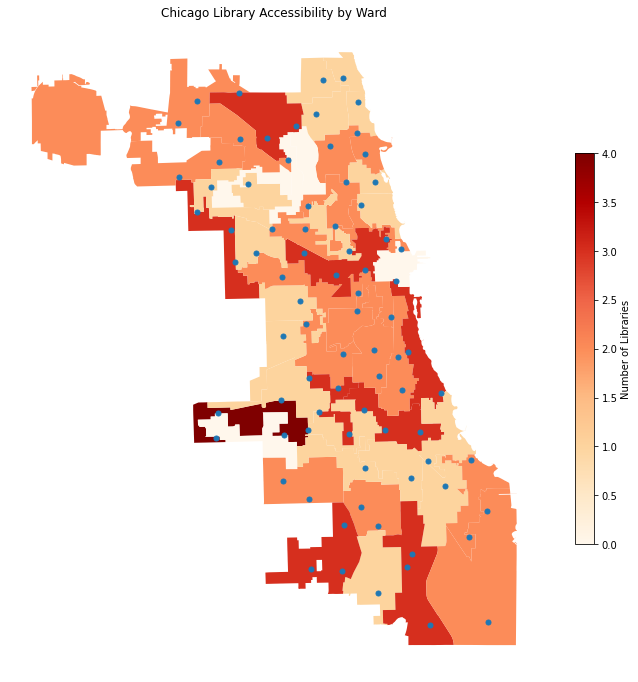

In [38]:
# choropleth map, shows libraires per ward
fig, ax = plt.subplots(1, 1, figsize=(12,12))
wards.plot(column="library_count", ax=ax, legend=True, cmap="OrRd",
           legend_kwds={'label': "Number of Libraries", 'shrink': 0.6})
# plot library points on top
libraries.plot(ax=ax, markersize=25, label="Library")

plt.title("Chicago Library Accessibility by Ward")
plt.axis("off")
plt.show()

/tmp/ipykernel_5997/3970442228.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  buffer["geometry"] = buffer.geometry.buffer(1000)


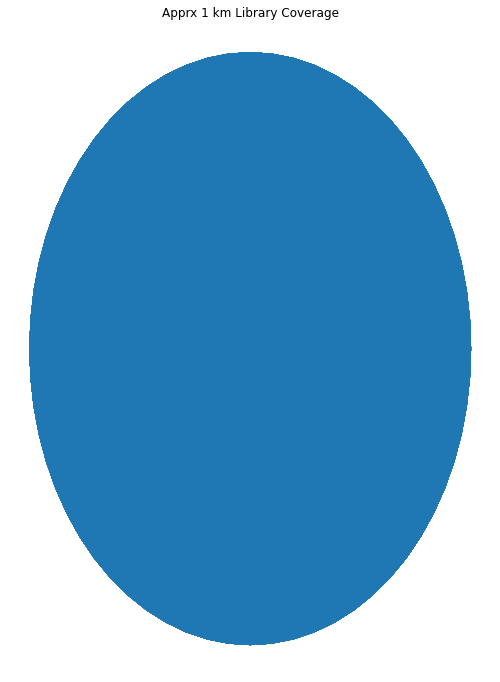

Wards with zero libraries:
['35', '13', '33', '30', '42']


In [42]:
# Create buffer 
buffer = libraries.copy()
buffer["geometry"] = buffer.geometry.buffer(1000)

fig, ax = plt.subplots(1, 1, figsize=(12, 12))
wards.plot(ax=ax,)
buffer.plot(ax=ax, alpha=0.5)
plt.title("Apprx 1 km Library Coverage")
plt.axis("off")
plt.show()

# find wards that dont have any libraries
underserved = wards[wards["library_count"] == 0]
print("Wards with zero libraries:")
print(underserved["ward"].tolist())

## 5. Conclusion

Our spatial analysis shows that public library access in Chicago is uneven across wards. Some wards have multiple libraries while others have none. The choropleth map clearly shows this variation, and the 1 km buffer visualization shows which parts of the city are well covered versus underserved.

Wards with low or zero library counts might face larger barriers to accessing library resources which could impact people’s access to books, technology, and community programs. This kind of spatial insight can help urban planning and city agencies target areas for future library investments.

This project provies good insight we could take it one step further by incorporating population data to understand library access compared to the population  

Overall, this analysis demonstrates how geospatial data science can inform equal distribution of public resources and be useful for more inclusive urban planning decisions.
